#1. Import Libraries

In [0]:
import pandas as pd
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab import files
import io

#2. Upload and Read Data

---


Data จาก https://www.kaggle.com/c/titanic/data
และเอา Training กับ Test Data มาต่อกัน ดังภาพ<br>
<a href="https://ibb.co/xHvh1XQ"><img src="https://i.ibb.co/QdB9PpG/TT.jpg" alt="TT" border="0"></a>

In [2]:
Uploaded = files.upload()

Saving Train&Test_TitanicDataForMachineLearning.csv to Train&Test_TitanicDataForMachineLearning.csv


In [3]:
Data = pd.read_csv(io.StringIO(Uploaded['Train&Test_TitanicDataForMachineLearning.csv'].decode('utf-8')), index_col=0) #เอา PassengerID เป็น Column เพราะไม่ได้ใช้ และเลขมันเรียงกันอยู่แล้ว
Data

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
PassengerId,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1.0
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1.0
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,NaN
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,NaN
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,NaN


#3. Cleaning and Preparing Data

In [4]:
#เราตัด Features ที่เราจะไม่ใช้ออก
Data.drop(axis = 1, columns=['Name', 'Ticket', 'Cabin', 'Embarked'], inplace=True)
Data

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
PassengerId,,,,,,,
1,3,male,22.0,1,0,7.2500,0.0
2,1,female,38.0,1,0,71.2833,1.0
3,3,female,26.0,0,0,7.9250,1.0
4,1,female,35.0,1,0,53.1000,1.0
5,3,male,35.0,0,0,8.0500,0.0
...,...,...,...,...,...,...,...
1305,3,male,NaN,0,0,8.0500,NaN
1306,1,female,39.0,0,0,108.9000,NaN
1307,3,male,38.5,0,0,7.2500,NaN


In [5]:
Data.info()
#อายุกับค่าตั๋วยังมีค่า NaN

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1309 non-null   int64  
 1   Sex       1309 non-null   object 
 2   Age       1046 non-null   float64
 3   SibSp     1309 non-null   int64  
 4   Parch     1309 non-null   int64  
 5   Fare      1308 non-null   float64
 6   Survived  891 non-null    float64
dtypes: float64(3), int64(3), object(1)
memory usage: 81.8+ KB


In [6]:
#เราจะใช้ ค่าเฉลี่ยของอายุและค่าตั๋วแบบไม่มีจุดทศนิยม เดิมลงไปในช่องว่าง
avr_age = Data['Age'].mean()
avr_fare = Data.Fare.mean()

Data.Age.fillna(value=round(avr_age, 0), inplace=True)
Data['Fare'].fillna(value=round(avr_fare, 0), inplace=True)
Data

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
PassengerId,,,,,,,
1,3,male,22.0,1,0,7.2500,0.0
2,1,female,38.0,1,0,71.2833,1.0
3,3,female,26.0,0,0,7.9250,1.0
4,1,female,35.0,1,0,53.1000,1.0
5,3,male,35.0,0,0,8.0500,0.0
...,...,...,...,...,...,...,...
1305,3,male,30.0,0,0,8.0500,NaN
1306,1,female,39.0,0,0,108.9000,NaN
1307,3,male,38.5,0,0,7.2500,NaN


In [7]:
Data.info()
#ตอนนี้เราก็ได้ Data ที่ไม่มี Missing Value แล้ว แต่อยากจะแปลง Data เป็นตัวเลขให้หมดก่อน

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1309 non-null   int64  
 1   Sex       1309 non-null   object 
 2   Age       1309 non-null   float64
 3   SibSp     1309 non-null   int64  
 4   Parch     1309 non-null   int64  
 5   Fare      1309 non-null   float64
 6   Survived  891 non-null    float64
dtypes: float64(3), int64(3), object(1)
memory usage: 81.8+ KB


In [8]:
#เปลี่ยนชื่อ Columns จาก Sex เป็น Gender และเปลี่ยน female เป็น 0 male เป็น 1 เพื่อง่ายต่อการเข้า Model Logistic Regression Binary Class
Data.rename(columns={'Sex': 'Gender'}, inplace = True)
Data['Gender'].replace({'female': 0,
                        'male': 1}, inplace=True)
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1309 non-null   int64  
 1   Gender    1309 non-null   int64  
 2   Age       1309 non-null   float64
 3   SibSp     1309 non-null   int64  
 4   Parch     1309 non-null   int64  
 5   Fare      1309 non-null   float64
 6   Survived  891 non-null    float64
dtypes: float64(3), int64(4)
memory usage: 81.8 KB


In [9]:
Data

,Pclass,Gender,Age,SibSp,Parch,Fare,Survived
PassengerId,,,,,,,
1,3,1,22.0,1,0,7.2500,0.0
2,1,0,38.0,1,0,71.2833,1.0
3,3,0,26.0,0,0,7.9250,1.0
4,1,0,35.0,1,0,53.1000,1.0
5,3,1,35.0,0,0,8.0500,0.0
...,...,...,...,...,...,...,...
1305,3,1,30.0,0,0,8.0500,NaN
1306,1,0,39.0,0,0,108.9000,NaN
1307,3,1,38.5,0,0,7.2500,NaN


In [0]:
# Data.to_csv('CleanTitanic.csv')

#4. Seperate Data

In [11]:
DataMatrix = Data.values
DataMatrix

array([[ 3.    ,  1.    , 22.    , ...,  0.    ,  7.25  ,  0.    ],
       [ 1.    ,  0.    , 38.    , ...,  0.    , 71.2833,  1.    ],
       [ 3.    ,  0.    , 26.    , ...,  0.    ,  7.925 ,  1.    ],
       ...,
       [ 3.    ,  1.    , 38.5   , ...,  0.    ,  7.25  ,     nan],
       [ 3.    ,  1.    , 30.    , ...,  0.    ,  8.05  ,     nan],
       [ 3.    ,  1.    , 30.    , ...,  1.    , 22.3583,     nan]])

In [0]:
#แบ่ง Data เป็น 3 ก้อน
X_Train = DataMatrix[:750, :-1] #1. Training_Set เอาไว้ Train Model
Y_Train = DataMatrix[:750, -1:]

X_Test = DataMatrix[750:891, :-1] #2. Test_Set เอาไว้หา Error
Y_Test = DataMatrix[750:891, -1:]

Prediction_Set = DataMatrix[891:, :-1] #3. Prediction_Set เอาไว้ดูว่าคนในนี้จะรอดไหม

In [0]:
# X_Train

In [0]:
# Y_Train

In [0]:
# X_Test

In [0]:
# Y_Test

In [0]:
# Prediction_Set

#5. Write Function

In [0]:
def LoR_Create_Xb(X):
  N = X.shape[0]
  b = np.ones([N, 1])
  Xb = np.hstack([b, X])
  return Xb

In [0]:
def LoR_Find_W_Local(X, Y, epoch=1000, lr=0.1):
  Xb = LoR_Create_Xb(X)
  N = Xb.shape[0]
  D_1 = Xb.shape[1]
  W = np.random.randn(D_1, 1) / np.sqrt(D_1)
  error_list = []
  for i in range(epoch):
    Yhat = LoR_Find_Yhat(X, W)
    error = (-Y*np.log(Yhat) - (1-Y)*np.log(1-Yhat)).sum()
    error_list.append(error)
    S = np.dot(Xb.T, (Y-Yhat))
    W = W + ((lr/N)*S)
    print(f'epoch ที่ {i+1}, error = {error}')
  return W, error_list

In [0]:
def LoR_Find_Yhat(X, W):
  Xb = LoR_Create_Xb(X)
  Z = np.dot(Xb, W)
  Yhat = 1/(1 + np.exp(-Z)) #Sigmoid Function เอาไว้บีบค่าตั้งแต่ -inf ถึง inf ให้อยู่ในช่วง 0 กับ 1 เพราะเราทำเป็น Binary Class (รอด หรือ ไม่รอด)
  return Yhat

In [0]:
def LoR_Find_Error_Binary_Class(Y, Yhat):
  N = Y.shape[0]
  Error = (((Y != Yhat).sum())*100) / N
  return Error

In [0]:
def mean4norm(X):
  _mean = X.mean(axis=0)
  return _mean.reshape(1, -1)

In [0]:
def std4norm(X):
  _std = X.std(axis=0)
  return _std.reshape(1, -1)

In [0]:
#เราจะ Normalization ด้วย Standardization
def Standardization(Data, Mean, Std):
  Data_Norm = (Data - Mean) / Std
  return Data_Norm

In [0]:
#เราจะ ไม่ Denormalization เพราะ จะ De หรือไม่ De เวลาผ่าน Sigmoid ก็จะกลายเป็น 0 - 1 อยู่ดี

# def De_Standardization(Data_Norm, Mean, Std):
#   Data = Data_Norm * Std + Mean
#   return Data

#6. Normalization

In [26]:
Mean_Train = mean4norm(X_Train)
Std_Train = std4norm(X_Train)

X_Train_Norm = Standardization(X_Train, Mean_Train, Std_Train)
X_Train_Norm.shape

(750, 6)

#7. Train Model

In [0]:
# W, error_list = LoR_Find_W_Local(X_Train_Norm, Y_Train, epoch=1000000, lr=0.01)
# #Train ยังไง Error ก็ไม่ต่ำกว่า 336.8765460309804

In [0]:
# plt.plot(error_list)
# plt.show()

In [0]:
# ได้ค่า W ออกมาแล้ว =
# [[-0.61088728],
# [-0.89363127],
# [-1.33136947],
# [-0.4335152 ],
# [-0.30471894],
# [-0.16700095],
# [ 0.11667561]] รอบหลังเราก็ไม่ต้อง Train หา Weight แล้ว ใช้ตัวนี้ได้เลย

W = [[-0.61088728],
       [-0.89363127],
       [-1.33136947],
       [-0.4335152 ],
       [-0.30471894],
       [-0.16700095],
       [ 0.11667561]]

In [0]:
# np.array(W).shape

In [31]:
Yhat_Train = LoR_Find_Yhat(X_Train_Norm, W)
Yhat_Train.round(0)

array([[0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

In [32]:
np.hstack([Y_Train, Yhat_Train.round(0)])

array([[0., 0.],
       [1., 1.],
       [1., 1.],
       ...,
       [1., 1.],
       [0., 1.],
       [0., 0.]])

In [33]:
Error_Train = LoR_Find_Error_Binary_Class(Y_Train, Yhat_Train.round(0))
print(f'ค่า Error = {Error_Train}%')

ค่า Error = 20.4%


#8. Test Model

In [0]:
X_Test_Norm = Standardization(X_Test, Mean_Train, Std_Train)

In [35]:
Yhat_Test = LoR_Find_Yhat(X_Test_Norm, W)
Yhat_Test.round(0)

array([[1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],

In [36]:
Error_Test = LoR_Find_Error_Binary_Class(Y_Test, Yhat_Test.round(0))
print(f'Error Test = {Error_Test.round(2)}%')

Error Test = 18.44%


#9. Prediction

In [37]:
Prediction_Set_Norm = Standardization(Prediction_Set, Mean_Train, Std_Train)
Survival_Prediction = LoR_Find_Yhat(Prediction_Set_Norm, W)
Survival_Prediction.round(0)

array([[0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],

##9.2 Savefile(Optional)

In [0]:
# np.savetxt('Titanic_Survival_Prediction.csv', Survival_Prediction.round(0), delimiter=',', fmt='%d')

#10. Visualization

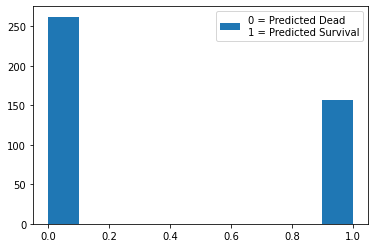

In [39]:
plt.hist(Survival_Prediction.round(0), label='0 = Predicted Dead\n1 = Predicted Survival', bins=10)
plt.legend()
plt.show()